# Аналіз US Stock Market 2020 to 2024

Імпорт залежностей.

In [1]:
import random

import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

from src.data.util.dataset import download_and_unzip
from src.definitions import EXTERNAL_DATA_FOLDER
from src.visualization.plot import plot_stock_prices, plot_stock_volumes

random_seed = 42

random.seed(random_seed)
np.random.seed(random_seed)

## Лабораторна робота №1

1. Обрати набір даних (датасет), який буде представляти собою часовий ряд (одновимірний або багатовимірний).
- Дата сет можна знайти на сайті kaggle, або будь який на ваш вибір, головне, щоб дані були репрезентативними і містили певну кількість записів для роботи з ними.

In [2]:
data_path = download_and_unzip(
    "dhavalpatel555",
    "us-stock-market-2020-to-2024",
    EXTERNAL_DATA_FOLDER,
)

df = pd.read_csv(data_path / "US Stock Market Dataset.csv")
df = df.rename({df.columns[0]: "id"}, axis=1)
df = df.set_index("id")
df = df.dropna(subset=["Date"])
df["Date"] = pd.to_datetime(
    df["Date"],
    format="mixed",
    dayfirst=True,
)
df = df.iloc[::-1]
df = df.replace(",", "", regex=True)

df["Bitcoin_Price"] = df["Bitcoin_Price"].astype(float)
df["Platinum_Price"] = df["Platinum_Price"].astype(float)
df["Ethereum_Price"] = df["Ethereum_Price"].astype(float)
df["S&P_500_Price"] = df["S&P_500_Price"].astype(float)
df["Nasdaq_100_Price"] = df["Nasdaq_100_Price"].astype(float)
df["Berkshire_Price"] = df["Berkshire_Price"].astype(float)
df["Gold_Price"] = df["Gold_Price"].astype(float)

df.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
id,,,,,,,,,,,,,,,,,,,,,
1012,2020-01-02,2.122,164570.0,61.18,486870.0,2.8250,72460.0,6967.0,632780,986.90,...,342261.0,410,329.81,4350000,94.90,80720000,209.78,12090000,1528.1,270550.0
1011,2020-01-03,2.130,144670.0,63.05,885860.0,2.7870,74750.0,7343.1,936290,988.55,...,339155.0,220,325.90,3800000,93.75,75330000,208.67,11200000,1552.4,436740.0
1010,2020-01-06,2.135,154680.0,63.27,724240.0,2.7900,59570.0,7759.1,786750,969.35,...,340210.0,280,335.83,5670000,95.14,81310000,212.60,17070000,1568.8,558970.0
1009,2020-01-07,2.162,163010.0,62.70,582650.0,2.7935,59470.0,8155.7,1010000,977.75,...,338901.0,280,330.75,4740000,95.34,82680000,213.06,15110000,1574.3,435870.0
1008,2020-01-08,2.141,242560.0,59.61,1210000.0,2.8120,77700.0,8059.6,1190000,961.00,...,339188.0,190,339.26,7110000,94.60,70240000,215.22,13490000,1560.2,813410.0


In [3]:
df.describe()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
count,1013,1013.000000,1009.000000,1013.000000,9.900000e+02,1013.000000,976.000000,1013.000000,1.013000e+03,1013.000000,...,1013.000000,1013.000000,1013.000000,1.013000e+03,1013.000000,1.013000e+03,1013.000000,1.013000e+03,1013.000000,1011.000000
mean,2022-01-18 19:55:29.911155200,3.726667,129091.932607,69.853475,3.571739e+05,3.726843,37606.752049,29215.594965,4.924137e+07,978.398371,...,424871.307009,2918.400790,422.035479,7.012043e+06,137.426209,7.452566e+07,252.151046,2.504895e+07,1839.171668,189442.393670
min,2020-01-02 00:00:00,1.482000,1200.000000,-37.630000,1.702000e+04,2.100500,10.000000,4826.000000,2.600000e+02,595.200000,...,240000.000000,120.000000,166.370000,1.140000e+06,81.820000,2.162000e+07,88.910000,5.470000e+06,1477.900000,0.000000
25%,2021-01-08 00:00:00,2.447000,88680.000000,54.760000,2.751800e+05,3.408000,380.000000,17180.100000,7.142000e+04,909.600000,...,349540.000000,760.000000,338.630000,3.780000e+06,114.770000,5.192000e+07,195.210000,1.612000e+07,1763.800000,142985.000000
50%,2022-01-20 00:00:00,2.880000,125980.000000,72.910000,3.450350e+05,3.800500,31635.000000,27634.900000,1.288800e+05,969.700000,...,432000.000000,2040.000000,431.600000,5.380000e+06,142.300000,6.515000e+07,262.010000,2.107000e+07,1835.800000,181200.000000
75%,2023-01-31 00:00:00,4.805000,164810.000000,82.810000,4.269225e+05,4.251500,70982.500000,40914.800000,3.860000e+05,1036.900000,...,481955.000000,4090.000000,509.640000,7.890000e+06,161.060000,8.683000e+07,313.190000,2.903000e+07,1936.600000,231500.000000
max,2024-02-02 00:00:00,9.647000,381970.000000,123.700000,1.770000e+06,4.937500,176040.000000,67527.900000,4.470000e+09,1297.100000,...,589498.000000,13850.000000,691.690000,1.333900e+08,186.570000,3.113500e+08,474.990000,2.304100e+08,2089.700000,813410.000000
std,NaN,1.943030,64035.426727,21.986697,1.864309e+05,0.646524,39192.315092,15115.630151,3.251389e+08,108.577041,...,82654.637405,2715.637488,119.765870,6.788094e+06,27.321896,3.376809e+07,72.949246,1.635122e+07,119.066900,104007.872337


2. Зобразіть часовий ряд графічно (одним графіком якщо це однокритеріальна задача, декількома - якщо багатокритеріальна).

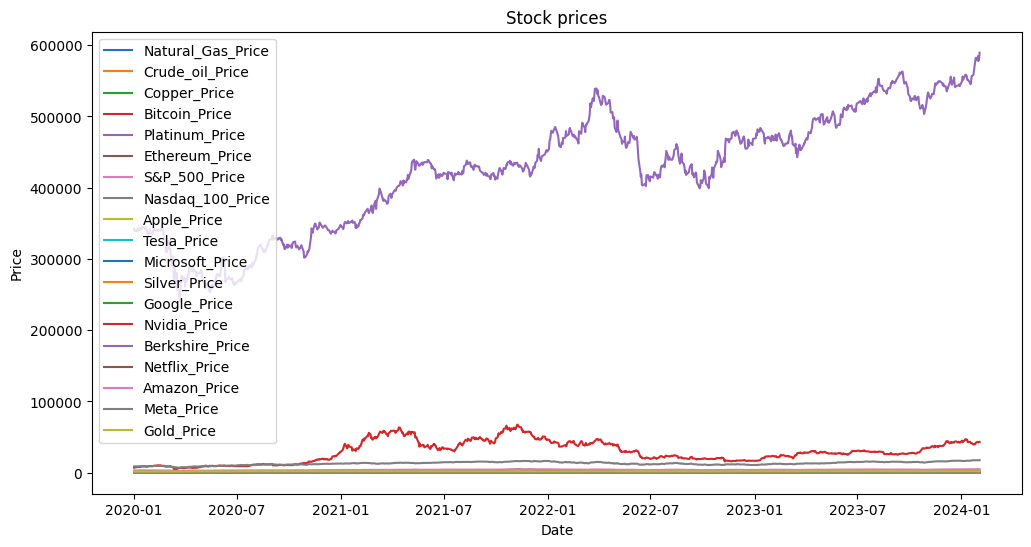

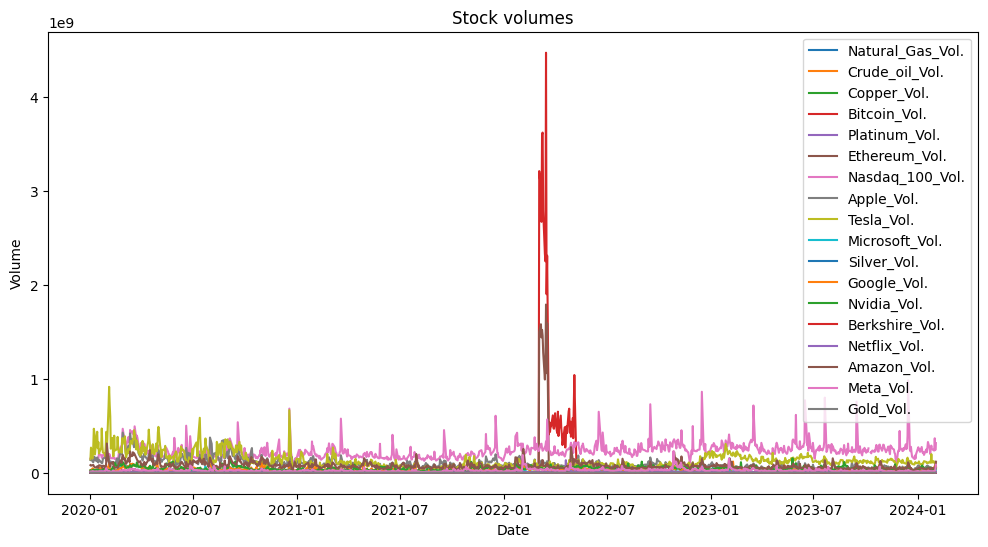

In [4]:
plot_stock_prices(df)
plot_stock_volumes(df)

3. Виконайте попередню обробку часового ряду:
- Перевірте дані на пропуски
- Виконайте фільтрацію даних часового ряду
- Зменшіть кількість атрибутів (у разі якщо це багатовимірний часовий ряд)

In [5]:
df.isnull().sum()

Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        377
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           46
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
dtype: int64

In [6]:
df["Natural_Gas_Vol."] = df["Natural_Gas_Vol."].ffill()
df["Crude_oil_Vol."] = df["Crude_oil_Vol."].ffill()
df["Copper_Vol."] = df["Copper_Vol."].ffill()
df["Platinum_Vol."] = df["Platinum_Vol."].ffill()
df["Nasdaq_100_Vol."] = df["Nasdaq_100_Vol."].ffill()
df["Silver_Vol."] = df["Silver_Vol."].ffill()
df["Gold_Vol."] = df["Gold_Vol."].ffill()

df["Platinum_Vol."] = df["Platinum_Vol."].bfill()

df.isnull().sum()

Date                 0
Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Copper_Vol.          0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Platinum_Vol.        0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Silver_Vol.          0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
dtype: int64

In [7]:
df.describe()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
count,1013,1013.000000,1013.000000,1013.000000,1.013000e+03,1013.000000,1013.000000,1013.000000,1.013000e+03,1013.000000,...,1013.000000,1013.000000,1013.000000,1.013000e+03,1013.000000,1.013000e+03,1013.000000,1.013000e+03,1013.000000,1013.000000
mean,2022-01-18 19:55:29.911155200,3.726667,129033.928924,69.853475,3.579282e+05,3.726843,37961.846002,29215.594965,4.924137e+07,978.398371,...,424871.307009,2918.400790,422.035479,7.012043e+06,137.426209,7.452566e+07,252.151046,2.504895e+07,1839.171668,189587.364265
min,2020-01-02 00:00:00,1.482000,1200.000000,-37.630000,1.702000e+04,2.100500,10.000000,4826.000000,2.600000e+02,595.200000,...,240000.000000,120.000000,166.370000,1.140000e+06,81.820000,2.162000e+07,88.910000,5.470000e+06,1477.900000,0.000000
25%,2021-01-08 00:00:00,2.447000,88680.000000,54.760000,2.773500e+05,3.408000,420.000000,17180.100000,7.142000e+04,909.600000,...,349540.000000,760.000000,338.630000,3.780000e+06,114.770000,5.192000e+07,195.210000,1.612000e+07,1763.800000,143050.000000
50%,2022-01-20 00:00:00,2.880000,126330.000000,72.910000,3.480000e+05,3.800500,38000.000000,27634.900000,1.288800e+05,969.700000,...,432000.000000,2040.000000,431.600000,5.380000e+06,142.300000,6.515000e+07,262.010000,2.107000e+07,1835.800000,181340.000000
75%,2023-01-31 00:00:00,4.805000,164650.000000,82.810000,4.226400e+05,4.251500,70330.000000,40914.800000,3.860000e+05,1036.900000,...,481955.000000,4090.000000,509.640000,7.890000e+06,161.060000,8.683000e+07,313.190000,2.903000e+07,1936.600000,231520.000000
max,2024-02-02 00:00:00,9.647000,381970.000000,123.700000,1.770000e+06,4.937500,176040.000000,67527.900000,4.470000e+09,1297.100000,...,589498.000000,13850.000000,691.690000,1.333900e+08,186.570000,3.113500e+08,474.990000,2.304100e+08,2089.700000,813410.000000
std,NaN,1.943030,63976.206463,21.986697,1.844652e+05,0.646524,38646.012018,15115.630151,3.251389e+08,108.577041,...,82654.637405,2715.637488,119.765870,6.788094e+06,27.321896,3.376809e+07,72.949246,1.635122e+07,119.066900,103956.243766
